In [319]:
from google.colab import drive    #Mounting GDrive for data files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Handling Missing Values
Missing values might be the most undesired values in data science.We definitely do not want to have them.
1. Let's start by creating a sample data frame and adding some missing values to it.

In [320]:
import numpy as np
import pandas as pd

In [321]:
df=pd.DataFrame({
    "Date":pd.date_range(start="2021-10-01",periods=10,freq="D"),
    "Item":1014,
    "Measure_1":np.random.randint(1,10,size=10),
    "Measure_2":np.random.random(10).round(2),  #why random.random?
    "Measure_3":np.random.random(10).round(2),
    "Measure_4":np.random.randn(10)             #what is randn()?
})

In [322]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,0.078995
1,2021-10-02,1014,4,0.82,0.34,0.429110
2,2021-10-03,1014,9,0.55,0.88,-1.500406
3,2021-10-04,1014,7,0.10,0.08,-0.393241
4,2021-10-05,1014,4,0.30,0.83,1.166847
5,2021-10-06,1014,5,0.99,0.67,0.616378
6,2021-10-07,1014,5,0.18,0.08,0.471523
7,2021-10-08,1014,7,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,1014,6,0.22,0.30,-0.762398


In [323]:
#np.random.randint(1,10,size=10)
# Generate 10 random integers between 1 (inclusive) and 10 (exclusive)
#Generates an array of random floating-point numbers uniformly distributed between 0 (inclusive) and 1 (exclusive).
#10 random numbers from a standard normal distribution with mean 0 and standard deviation 1.
# # Example 2: Hourly frequency
# date_range_hourly = pd.date_range(start="2021-10-01", periods=10, freq="H")
# # Example 4: Monthly frequency (end of the month)
# date_range_monthly = pd.date_range(start="2021-01-01", periods=10, freq="M")
# print("\nMonthly Frequency (Month end):\n", date_range_monthly)

In [324]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,0.078995
1,2021-10-02,1014,4,0.82,0.34,0.429110
2,2021-10-03,1014,9,0.55,0.88,-1.500406
3,2021-10-04,1014,7,0.10,0.08,-0.393241
4,2021-10-05,1014,4,0.30,0.83,1.166847
5,2021-10-06,1014,5,0.99,0.67,0.616378
6,2021-10-07,1014,5,0.18,0.08,0.471523
7,2021-10-08,1014,7,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,1014,6,0.22,0.30,-0.762398


find mean and standard deviation of measure_4


In [325]:
#Adding few missing values
df.loc[[2,9],"Item"]=np.nan
df.loc[[2,7,9],"Measure_1"]=np.nan
df.loc[[2,3],"Measure_2"]=np.nan
df.loc[[2],"Measure_3"]=np.nan
df.loc[:6,"Measure_4"]=np.nan

In [326]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014.0,9.0,0.23,0.11,NaN
1,2021-10-02,1014.0,4.0,0.82,0.34,NaN
2,2021-10-03,NaN,NaN,NaN,NaN,NaN
3,2021-10-04,1014.0,7.0,NaN,0.08,NaN
4,2021-10-05,1014.0,4.0,0.30,0.83,NaN
5,2021-10-06,1014.0,5.0,0.99,0.67,NaN
6,2021-10-07,1014.0,5.0,0.18,0.08,NaN
7,2021-10-08,1014.0,NaN,0.03,0.14,-0.507575
8,2021-10-09,1014.0,7.0,0.13,0.44,-0.816478
9,2021-10-10,NaN,NaN,0.22,0.30,-0.762398


With Pandas, an integer type missing value representation (<NA>) was introduced so we can have missing values in integer columns as well. However, we need to explicitly declare the data type.

In [327]:
df=df.astype({
    "Item":pd.Int64Dtype(),
    "Measure_1":pd.Int64Dtype()
})

In [328]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,NaN
1,2021-10-02,1014,4,0.82,0.34,NaN
2,2021-10-03,<NA>,<NA>,NaN,NaN,NaN
3,2021-10-04,1014,7,NaN,0.08,NaN
4,2021-10-05,1014,4,0.30,0.83,NaN
5,2021-10-06,1014,5,0.99,0.67,NaN
6,2021-10-07,1014,5,0.18,0.08,NaN
7,2021-10-08,1014,<NA>,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,<NA>,<NA>,0.22,0.30,-0.762398


## Method 1: Drop rows or columns that have a missing value

In [329]:
#One option is to drop the rows or columns that contain a missing value.
df.dropna()
#With the default parameter values, the dropna function drops the rows that contain any
#missing value.

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
8,2021-10-09,1014,7,0.13,0.44,-0.816478


In [330]:
#We can also choose to drop columns that have at least one missing value by using the
#axis parameter.
df.dropna(axis=1)

,Date
0,2021-10-01
1,2021-10-02
2,2021-10-03
3,2021-10-04
4,2021-10-05
5,2021-10-06
6,2021-10-07
7,2021-10-08
8,2021-10-09
9,2021-10-10


In [331]:
#Another situation is to have a column or row that is full of missing values.
#The dropna function can be used for this as well. We just need to change the value of
#how parameter.
df.dropna(how="all")


,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,NaN
1,2021-10-02,1014,4,0.82,0.34,NaN
2,2021-10-03,<NA>,<NA>,NaN,NaN,NaN
3,2021-10-04,1014,7,NaN,0.08,NaN
4,2021-10-05,1014,4,0.30,0.83,NaN
5,2021-10-06,1014,5,0.99,0.67,NaN
6,2021-10-07,1014,5,0.18,0.08,NaN
7,2021-10-08,1014,<NA>,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,<NA>,<NA>,0.22,0.30,-0.762398


In [332]:
#Drop rows or columns based on a threshold value
#For instance, (thresh=4) means that the rows that have at least 4 non-missing values will be kept. The other ones will be dropped.
df.dropna(thresh=4)

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,NaN
1,2021-10-02,1014,4,0.82,0.34,NaN
3,2021-10-04,1014,7,NaN,0.08,NaN
4,2021-10-05,1014,4,0.30,0.83,NaN
5,2021-10-06,1014,5,0.99,0.67,NaN
6,2021-10-07,1014,5,0.18,0.08,NaN
7,2021-10-08,1014,<NA>,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,<NA>,<NA>,0.22,0.30,-0.762398


In [333]:
#Drop based on a particular subset of columns
#The subset parameter of the dropna function is used for this task. For instance,
#we can drop the rows that have a missing value in measure 1 or measure 2 columns as follows:
df.dropna(subset=["Measure_2","Measure_3"])

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,NaN
1,2021-10-02,1014,4,0.82,0.34,NaN
4,2021-10-05,1014,4,0.30,0.83,NaN
5,2021-10-06,1014,5,0.99,0.67,NaN
6,2021-10-07,1014,5,0.18,0.08,NaN
7,2021-10-08,1014,<NA>,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,<NA>,<NA>,0.22,0.30,-0.762398


## Method 2: Fill with a constant value

In [334]:
#We can choose a constant value to be used as a replacement for the missing values.
values={"Item":1014,"Measure_1":0}
df.fillna(value=values)

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,NaN
1,2021-10-02,1014,4,0.82,0.34,NaN
2,2021-10-03,1014,0,NaN,NaN,NaN
3,2021-10-04,1014,7,NaN,0.08,NaN
4,2021-10-05,1014,4,0.30,0.83,NaN
5,2021-10-06,1014,5,0.99,0.67,NaN
6,2021-10-07,1014,5,0.18,0.08,NaN
7,2021-10-08,1014,0,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,1014,0,0.22,0.30,-0.762398


## Method 3: Fill with an aggregated value

In [335]:
#Another option is to use an aggregated value such as mean, median, or mode.
#Mean
df["Measure_2"].fillna(df["Measure_2"].mean())

,Measure_2
0,0.2300
1,0.8200
2,0.3625
3,0.3625
4,0.3000
5,0.9900
6,0.1800
7,0.0300
8,0.1300
9,0.2200


In [336]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,NaN
1,2021-10-02,1014,4,0.82,0.34,NaN
2,2021-10-03,<NA>,<NA>,NaN,NaN,NaN
3,2021-10-04,1014,7,NaN,0.08,NaN
4,2021-10-05,1014,4,0.30,0.83,NaN
5,2021-10-06,1014,5,0.99,0.67,NaN
6,2021-10-07,1014,5,0.18,0.08,NaN
7,2021-10-08,1014,<NA>,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,<NA>,<NA>,0.22,0.30,-0.762398


In [337]:
df["Measure_1"].fillna(df["Measure_1"].median())
# from sklearn.impute import SimpleImputer
# my_imputer=SimpleImputer(strategy='median')
# my_imputer.fit_transform(np.array(df['Measure_3']).reshape(-1,1))

,Measure_1
0,9
1,4
2,5
3,7
4,4
5,5
6,5
7,5
8,7
9,5


## Method 4: Replace with the previous or next value

In [338]:
#It is possible to replace the missing values in a column with the previous or next value
# in that column.
#This method might come in handy when working with time-series data.
#Consider you have a data frame that contains the daily temperature measurement
# and the temperate in one day is missing.
#The optimal solution would be to use the temperature in the next or previous day.
df.fillna(method="ffill")

/tmp/ipython-input-3767167587.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,NaN
1,2021-10-02,1014,4,0.82,0.34,NaN
2,2021-10-03,1014,4,0.82,0.34,NaN
3,2021-10-04,1014,7,0.82,0.08,NaN
4,2021-10-05,1014,4,0.30,0.83,NaN
5,2021-10-06,1014,5,0.99,0.67,NaN
6,2021-10-07,1014,5,0.18,0.08,NaN
7,2021-10-08,1014,5,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,1014,7,0.22,0.30,-0.762398


In [339]:
#we can limit the number of missing values replaced with this method.
#If we set the limit parameter as 1, then a missing value can only be replaced with its next value.
#The second or third following value will not be used for replacement.
df.fillna(method="bfill",limit=1)

/tmp/ipython-input-2464338646.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill",limit=1)


,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,NaN
1,2021-10-02,1014,4,0.82,0.34,NaN
2,2021-10-03,1014,7,NaN,0.08,NaN
3,2021-10-04,1014,7,0.30,0.08,NaN
4,2021-10-05,1014,4,0.30,0.83,NaN
5,2021-10-06,1014,5,0.99,0.67,NaN
6,2021-10-07,1014,5,0.18,0.08,-0.507575
7,2021-10-08,1014,7,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,<NA>,<NA>,0.22,0.30,-0.762398


## Method 5: Fill by using another dataframe

We can also pass another data frame to the fillna function. The values in the new data frame will be used to replace the missing values in the current data frame.

The values will be selected according to the row indices and column names. For instance, if there is a missing value in the second row in the item column, the value in the same location in the new data frame will be used.

In [340]:
#Defining a new dataframe
df1=pd.DataFrame({
    "Date":pd.date_range(start="2021-10-01",periods=10,freq="D"),
    "Item":1014,
    "Measure_1":np.random.randint(1,10,size=10),
    "Measure_2":np.random.random(10).round(2),
    "Measure_3":np.random.random(10).round(2),
    "Measure_4":np.random.randn(10)
})
df1

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,3,0.69,0.11,0.072114
1,2021-10-02,1014,4,0.67,0.97,-0.632034
2,2021-10-03,1014,9,0.31,0.38,-0.290794
3,2021-10-04,1014,5,0.08,0.07,-0.518449
4,2021-10-05,1014,3,0.60,0.30,0.723093
5,2021-10-06,1014,9,0.21,0.83,-1.058705
6,2021-10-07,1014,4,0.67,0.14,-0.772517
7,2021-10-08,1014,8,0.47,0.84,-1.093722
8,2021-10-09,1014,2,0.84,0.80,0.674047
9,2021-10-10,1014,5,0.46,0.70,-0.563665


In [341]:
#Using df1 to fill missing values in df
df.fillna(df1)

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,9,0.23,0.11,0.072114
1,2021-10-02,1014,4,0.82,0.34,-0.632034
2,2021-10-03,1014,9,0.31,0.38,-0.290794
3,2021-10-04,1014,7,0.08,0.08,-0.518449
4,2021-10-05,1014,4,0.30,0.83,0.723093
5,2021-10-06,1014,5,0.99,0.67,-1.058705
6,2021-10-07,1014,5,0.18,0.08,-0.772517
7,2021-10-08,1014,8,0.03,0.14,-0.507575
8,2021-10-09,1014,7,0.13,0.44,-0.816478
9,2021-10-10,1014,5,0.22,0.30,-0.762398


## Method 6: Using KNN to impute missing values

In [490]:
#Loading the train.csv file from drive
train_url='https://drive.google.com/file/d/1wg7yxgVujhxu-3bZeQFrS-sAVIVpsVeI/view?usp=sharing'
train_url='https://drive.google.com/uc?id=' + train_url.split('/')[-2]
df2 = pd.read_csv(train_url)

In [447]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [448]:
df2.isna().sum()     #Shows the number of NaN in each column

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [449]:
#Dropping other columns with missing values or irrelevent data
df2.drop("Name",axis=1,inplace=True)
df2.drop("Ticket",axis=1,inplace=True)
df2.drop("PassengerId",axis=1,inplace=True)
df2.drop("Cabin",axis=1,inplace=True)
df2.drop("Embarked",axis=1,inplace=True)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [346]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Sex'] = le.fit_transform(df2['Sex'])

In [444]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [348]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [415]:
from sklearn.impute import KNNImputer
K=KNNImputer(n_neighbors=5)
df3=K.fit_transform(df2)
df2_imputed = pd.DataFrame(K.fit_transform(df2), columns=df2.columns)
df2_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
888,0.0,3.0,0.0,26.8,1.0,2.0,23.4500
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [350]:
df2_imputed.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


# Detect and Remove the Outliers

In [491]:
# Importing
import sklearn
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
shoppers_url='https://drive.google.com/file/d/1u6hrKQVDxpbdlwrybDeTboYGE-meyIid/view?usp=sharing'
shoppers_url='https://drive.google.com/uc?id=' + shoppers_url.split('/')[-2]


# Create the dataframe
df = pd.read_csv(shoppers_url)
print(df.shape)
df.head(10)


(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


## Method 1: Using Visualization techniques
Outliers can be detected using visualization techniques like boxplot and scatter plots

a. Using BoxPlot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x7c2149c52fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c2149c534a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c213d528da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c2149c539b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c2149c53cb0>],
 'means': []}

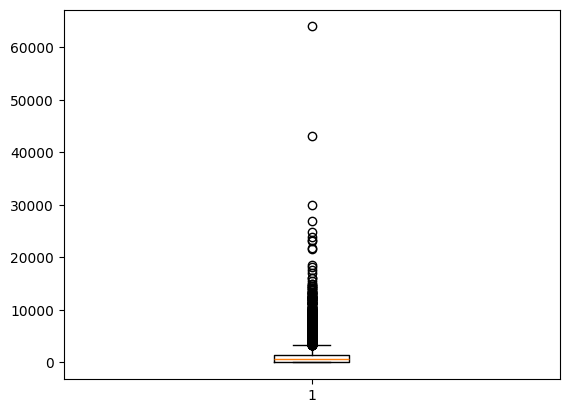

In [352]:
import seaborn as sns
plt.boxplot(df['ProductRelated_Duration'])

In [353]:
# Position of the Outlier
print(np.where(df['ProductRelated_Duration']>30000))

(array([5152, 8071]),)


b. ScatterPlot: It is used when you have paired numerical data, or when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

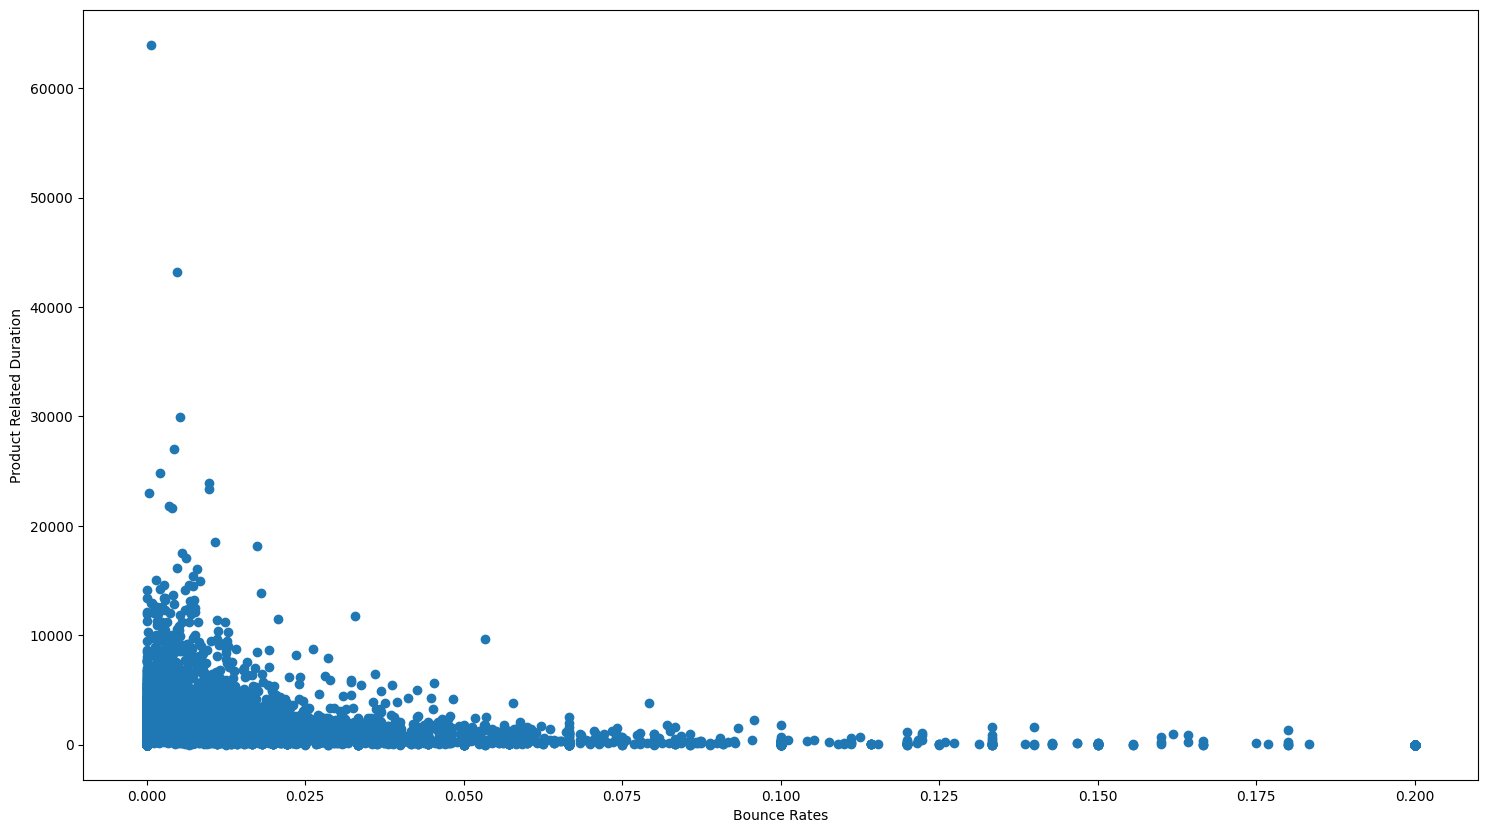

In [354]:
#To plot the scatter plot one requires two variables that are somehow related to each other.
#So here, "Proportion of non-retail business acres per town" and
#"Full-value property-tax rate per $10,000" are used
#whose column names are "INDUS" and "TAX" respectively.
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['BounceRates'], df['ProductRelated_Duration'])

# x-axis label
ax.set_xlabel('Bounce Rates')

# y-axis label
ax.set_ylabel('Product Related Duration')
plt.show()

Looking at the graph can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly;y opposite that is the top right corner of the graph. Those points in the top right corner can be regarded as Outliers.

Using approximation can say all those data points that are x>20 and y>600 are outliers.

In [355]:
# Position of the Outlier
print(np.where((df['BounceRates']>0.18)))
 #print(np.where((df['ProductRelated_Duration']>30000)))

(array([    0,     2,     6,     7,    16,    21,    24,    49,    50,
          55,    56,    64,    67,    69,    70,    78,    79,    84,
          85,    91,   111,   112,   125,   132,   140,   143,   151,
         156,   158,   159,   173,   178,   181,   182,   190,   252,
         261,   271,   286,   293,   298,   302,   330,   341,   344,
         356,   359,   383,   398,   418,   421,   426,   429,   456,
         458,   468,   479,   483,   512,   515,   532,   540,   554,
         577,   585,   589,   591,   638,   658,   659,   670,   720,
         724,   727,   743,   763,   774,   804,   805,   822,   831,
         870,   872,   889,   897,   922,   929,   933,   942,   945,
         947,   956,   974,   993,  1004,  1022,  1023,  1034,  1047,
        1059,  1118,  1119,  1123,  1133,  1142,  1143,  1154,  1169,
        1170,  1172,  1176,  1180,  1213,  1214,  1236,  1265,  1285,
        1291,  1325,  1332,  1356,  1363,  1366,  1381,  1389,  1390,
        1394,  1396

## Method 2: Using Z-score
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

In [356]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['ProductRelated_Duration']))
print(z)

[0.62434752 0.59090256 0.62434752 ... 0.52806261 0.4435357  0.61324275]


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [357]:
#threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([   66,   510,   799,   979,  1037,  1146,  1207,  1556,  1846,
        1855,  2133,  2414,  2415,  2560,  2564,  2590,  2599,  2645,
        2824,  2890,  2939,  2969,  3561,  3809,  4226,  4253,  4326,
        4629,  4674,  4933,  5045,  5152,  5425,  5639,  5679,  5755,
        5807,  5891,  5916,  5971,  5990,  6046,  6066,  6086,  6098,
        6103,  6165,  6170,  6248,  6278,  6322,  6335,  6337,  6422,
        6474,  6488,  6519,  6550,  6603,  6674,  6684,  6733,  6762,
        6770,  6787,  6797,  6820,  6862,  6941,  6992,  6998,  7290,
        7292,  7321,  7432,  7589,  7662,  7679,  7828,  7900,  7925,
        8071,  8093,  8094,  8125,  8230,  8238,  8278,  8308,  8355,
        8415,  8438,  8485,  8548,  8557,  8602,  8612,  8618,  8630,
        8655,  8725,  8764,  8784,  8830,  8872,  8877,  8878,  8883,
        8947,  8972,  9005,  9035,  9122,  9156,  9195,  9238,  9248,
        9298,  9371,  9400,  9483,  9484,  9539,  9576,  9688,  9704,
        9705,  9709

## Method 3: Inter Quartile Range
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [358]:
# IQR
import numpy as np
Q1 = np.percentile(df['ProductRelated_Duration'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['ProductRelated_Duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 + 1.5*IQR

lower = Q1 - 1.5*IQR

In [359]:
# Upper bound
upper = np.where(df['ProductRelated_Duration'] >= (Q3+1.5*IQR))
print(upper)
# Lower bound
lower = np.where(df['ProductRelated_Duration'] <= (Q1-1.5*IQR))
print(lower)

(array([   40,    66,   109,   195,   251,   265,   277,   334,   367,
         424,   470,   477,   499,   510,   575,   611,   619,   722,
         739,   769,   799,   825,   853,   884,   912,   952,   968,
         979,  1036,  1037,  1102,  1117,  1146,  1182,  1185,  1196,
        1207,  1233,  1324,  1339,  1499,  1519,  1554,  1556,  1564,
        1572,  1598,  1732,  1770,  1793,  1833,  1846,  1855,  1882,
        1958,  1973,  1986,  2011,  2040,  2045,  2071,  2073,  2093,
        2096,  2103,  2109,  2133,  2143,  2190,  2203,  2204,  2217,
        2219,  2256,  2262,  2301,  2372,  2387,  2397,  2414,  2415,
        2428,  2457,  2464,  2525,  2535,  2560,  2564,  2568,  2581,
        2590,  2595,  2599,  2633,  2645,  2744,  2746,  2824,  2825,
        2890,  2902,  2921,  2929,  2939,  2941,  2969,  2970,  2996,
        3029,  3091,  3114,  3127,  3156,  3178,  3179,  3185,  3228,
        3236,  3253,  3263,  3308,  3313,  3347,  3369,  3397,  3405,
        3439,  3453

In [360]:
df['ProductRelated_Duration'] >= (Q3+1.5*IQR)

,ProductRelated_Duration
0,False
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


In [361]:
upper

(array([   40,    66,   109,   195,   251,   265,   277,   334,   367,
          424,   470,   477,   499,   510,   575,   611,   619,   722,
          739,   769,   799,   825,   853,   884,   912,   952,   968,
          979,  1036,  1037,  1102,  1117,  1146,  1182,  1185,  1196,
         1207,  1233,  1324,  1339,  1499,  1519,  1554,  1556,  1564,
         1572,  1598,  1732,  1770,  1793,  1833,  1846,  1855,  1882,
         1958,  1973,  1986,  2011,  2040,  2045,  2071,  2073,  2093,
         2096,  2103,  2109,  2133,  2143,  2190,  2203,  2204,  2217,
         2219,  2256,  2262,  2301,  2372,  2387,  2397,  2414,  2415,
         2428,  2457,  2464,  2525,  2535,  2560,  2564,  2568,  2581,
         2590,  2595,  2599,  2633,  2645,  2744,  2746,  2824,  2825,
         2890,  2902,  2921,  2929,  2939,  2941,  2969,  2970,  2996,
         3029,  3091,  3114,  3127,  3156,  3178,  3179,  3185,  3228,
         3236,  3253,  3263,  3308,  3313,  3347,  3369,  3397,  3405,
      

In [362]:
#Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (11369, 18)


In [532]:
#ufiris- dataset that is labeled and contain 4 features crresponding to iris flower- pet al length, petal width, sepal length, sepal width
# one output label- speciesf
from sklearn.datasets import load_iris
iris=load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [364]:
X=iris.data
Y=iris.target

In [365]:
df=pd.DataFrame(data=X,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [366]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [367]:
df['species']=Y
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [368]:
!pip install missingno

<Axes: >

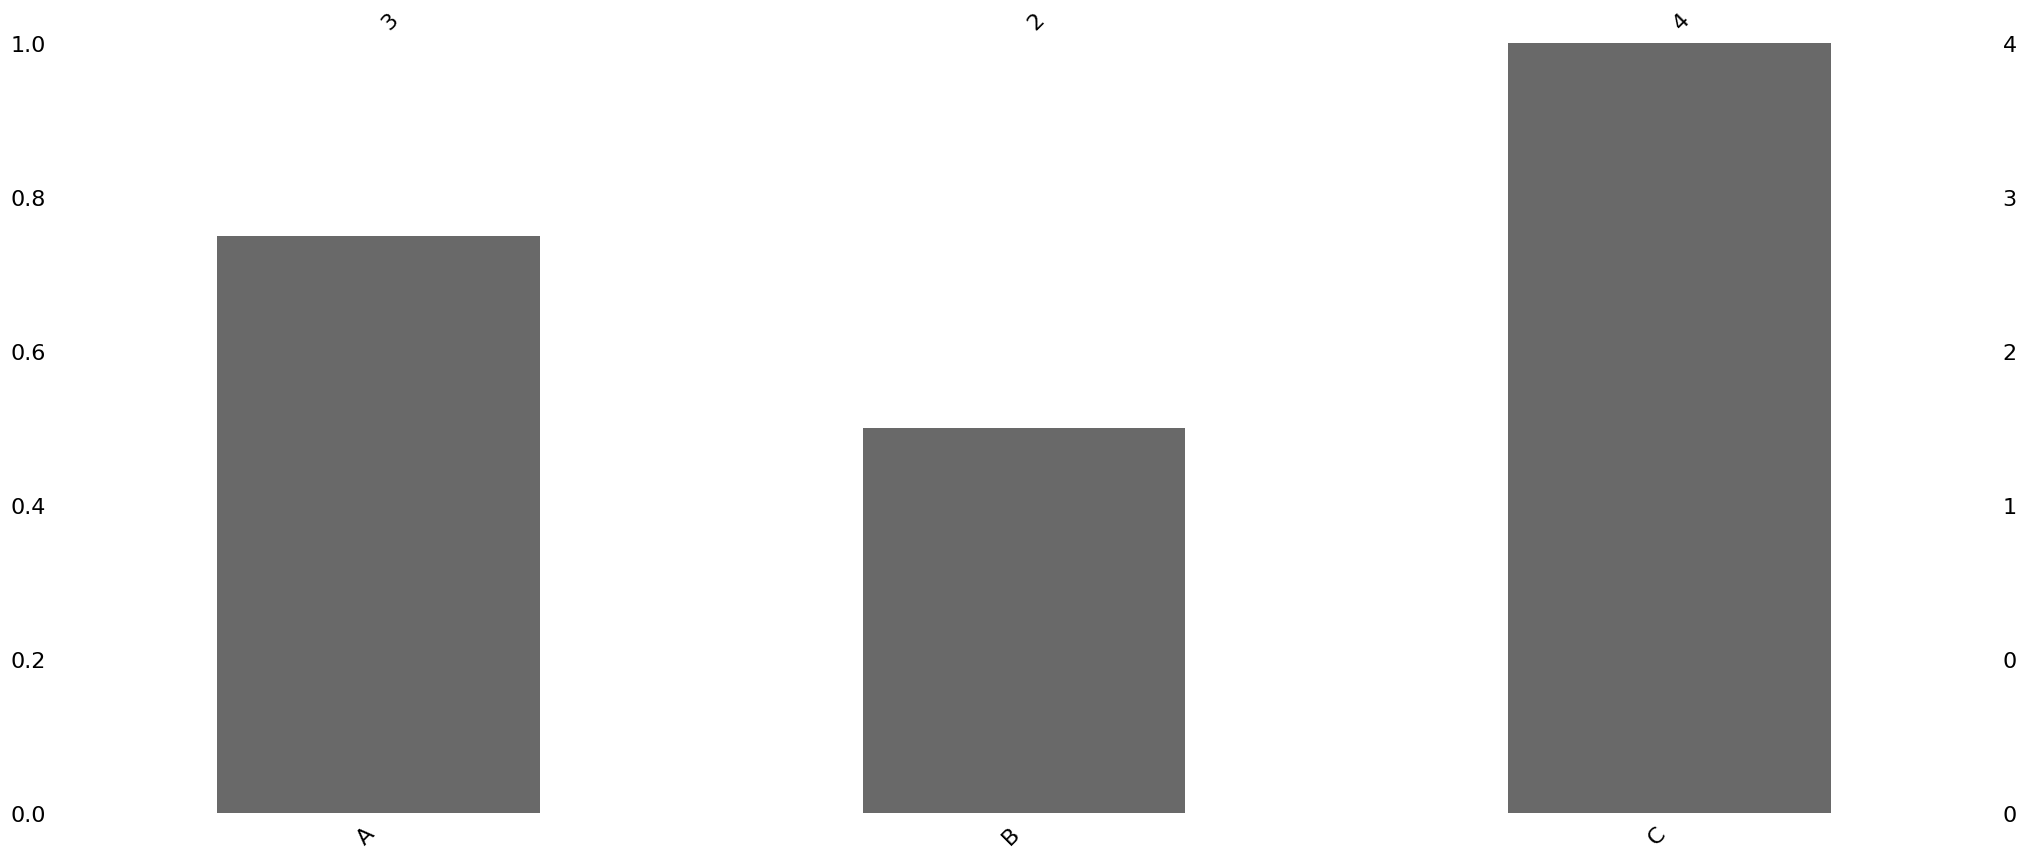

In [369]:
import missingno as msn
# Example DataFrame with some missing values
data = {'A': [1, 2, None, 4],
        'B': [5, None, None, 8],
        'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)

# Visualize missing data
msn.bar(df)

<Axes: >

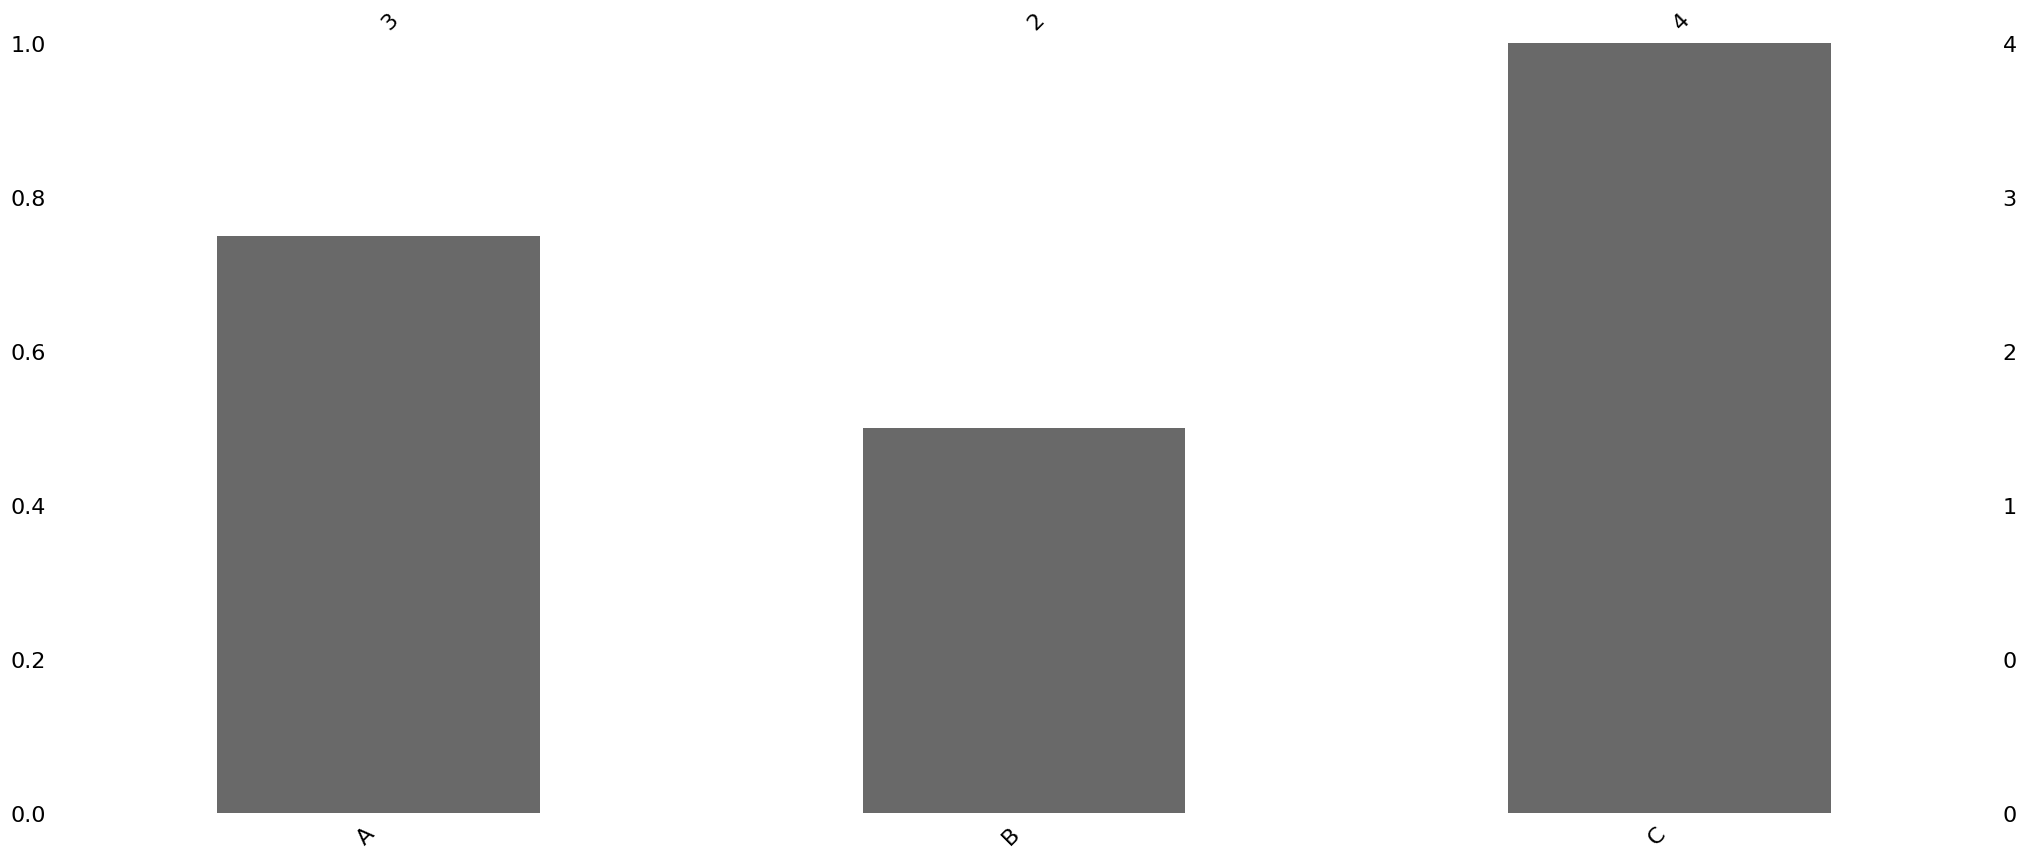

In [370]:
#Step2: Pre-processing
import missingno as msn
msn.bar(df)

<Axes: xlabel='count', ylabel='species'>

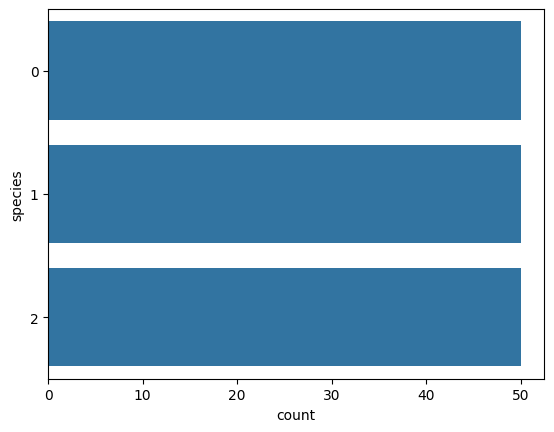

In [371]:
# Load the Iris dataset again
iris = load_iris()
X = iris.data
Y = iris.target

# Create the DataFrame with the 'species' column
iris_df = pd.DataFrame(data=X, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['species'] = Y

# Plot the count of species
sns.countplot(y=iris_df['species'])

<Axes: >

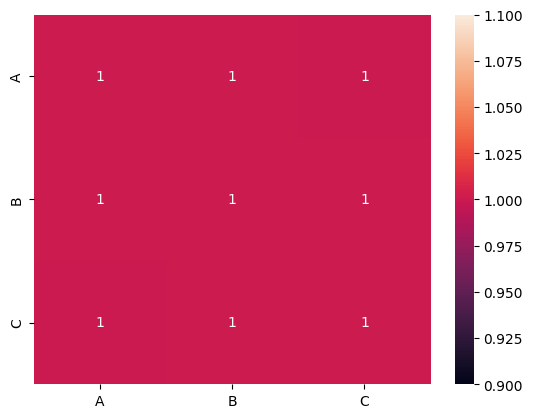

In [372]:
sns.heatmap(df.iloc[:,:4].corr(),annot=True)

#ASSIGNMENT QUESTIONS

## Missing Data Handling:
Load a dataset with some missing values. Try three different methods for handling missing data:

Dropping rows/columns
Replacing with mean/median
Using KNN Imputer or IterativeImputer
Compare the results.

## Scaling Techniques:
Apply Min-Max Scaling and Standard Scaling on the same dataset. Plot the distributions before and after scaling. Which scaling technique is more appropriate for features with outliers?

## Label Encoding vs One-Hot Encoding:
Take a categorical feature (e.g., "city" with values Delhi, Mumbai, Chennai). Encode it using both LabelEncoder and OneHotEncoder. Discuss when each should be used.

## Custom Function for Normalization:
Write a function to manually normalize a feature (0–1 range). Compare its output with MinMaxScaler from sklearn.

## Imputation with Domain Knowledge:
Suppose a "Salary" column has missing values. Instead of mean/median, fill them based on the "Education Level" column (hint: groupby + fillna). Show the steps.

## Detecting Outliers:
Implement Z-score method to detect outliers in a numeric feature. Compare it with the IQR method for the same feature.

## Feature Engineering:
Create a new feature by combining two existing features in the dataset (e.g., BMI = weight / height²). Normalize and scale the new feature.

## Suitable Datasets for Each Question

### Missing Data Handling

Dataset: Titanic dataset (seaborn.load_dataset("titanic")) → has many missing values (age, deck, embarked).

### Scaling Techniques

Dataset: Boston Housing (sklearn.datasets.fetch_california_housing) → has numerical features with different scales.

### Label Encoding vs One-Hot Encoding

Dataset: Titanic dataset (use "sex" or "embarked" column).

### Custom Function for Normalization

Dataset: Iris dataset (sklearn.datasets.load_iris) → numerical features like petal/sepal length.

### Imputation with Domain Knowledge

Dataset: Titanic dataset → impute "age" based on "class" or "sex".

### Detecting Outliers

Dataset: Boston Housing (or California Housing) → "house value" column has natural outliers.

### Feature Engineering

Dataset: Titanic → create "FamilySize" = SibSp + Parch + 1.

Or Iris → create "PetalRatio" = PetalLength / PetalWidth.

#ASSIGNMENT SOLUTIONS

##Missing Data Handling
Load a dataset with some missing values. Try three different methods for handling missing data:

* Dropping rows/columns
* Replacing with mean/median
* Using KNN Imputer or IterativeImputer

Compare the results.

In [424]:
import seaborn
titanic_df = seaborn.load_dataset("titanic")

In [425]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [426]:
titanic_df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


###Dropping rows/columns

In [403]:
titanic_df.isna().sum()[titanic_df.isna().sum() > 0]      #Getting the number of Nan in each column, where number of NaN > 0

,0
age,177
embarked,2
deck,688
embark_town,2


In [411]:
drop_c = titanic_df.dropna(axis=1) #Dropping Columns with missing values
drop_c

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [412]:
drop_r = titanic_df.dropna(axis=0) #Dropping Rows with missing values
drop_r

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


###Replacing with mean/median

In [427]:
replace_mean = titanic_df['age'].fillna(titanic_df['age'].mean())    #Replacing with mean values
replace_mean

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [428]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [429]:
replace_median = titanic_df['age'].fillna(titanic_df['age'].median())    #Replacing with median values
replace_median

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


###KNN Imputer

In [462]:
import seaborn
titanic_df = seaborn.load_dataset("titanic")

In [463]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [464]:
titanic_df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [465]:
titanic_df.drop('deck', axis=1, inplace=True)
titanic_df.drop('embark_town', axis=1, inplace=True)
titanic_df.drop('embarked', axis=1, inplace=True)
titanic_df.drop('fare', axis=1, inplace=True)
titanic_df.drop('class', axis=1, inplace=True)
titanic_df.drop('who', axis=1, inplace=True)
titanic_df.drop('adult_male', axis=1, inplace=True)
titanic_df.drop('alive', axis=1, inplace=True)
titanic_df.drop('alone', axis=1, inplace=True)
titanic_df

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [466]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic_df['sex'] = le.fit_transform(titanic_df['sex'])

In [467]:
titanic_df

,survived,pclass,sex,age,sibsp,parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,NaN,1,2
889,1,1,1,26.0,0,0


In [468]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch'], dtype='object')

In [469]:
from sklearn.impute import KNNImputer
K=KNNImputer(n_neighbors=5)

titanic_imputed = pd.DataFrame(K.fit_transform(titanic_df), columns=titanic_df.columns)
titanic_imputed

,survived,pclass,sex,age,sibsp,parch
0,0.0,3.0,1.0,22.0,1.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0
3,1.0,1.0,0.0,35.0,1.0,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0
...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0
887,1.0,1.0,0.0,19.0,0.0,0.0
888,0.0,3.0,0.0,18.8,1.0,2.0
889,1.0,1.0,1.0,26.0,0.0,0.0


In [470]:
titanic_imputed.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0


##Scaling Techniques
Apply Min-Max Scaling and Standard Scaling on the same dataset. Plot the distributions before and after scaling. Which scaling technique is more appropriate for features with outliers?

In [495]:
#Loading the data from GDrive link
#because sklearn.datasets.fetch_california_housing() was showing HTTP: 403 Forbidden Error


#URL to the data file
housing_data_url='https://drive.google.com/file/d/1wufowwwl36QcgFdskrWyrmAya_zpcsXO/view?usp=sharing'
housing_data_url='https://drive.google.com/uc?id=' + housing_data_url.split('/')[-2]

#Column names for the California Housing dataset (common features)
column_names = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
    'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'
]

# Read the data into a DataFrame
try:
    housing_df = pd.read_csv(housing_data_url, sep=',', header=None, names=column_names)
    display(housing_df.head())
except FileNotFoundError:
    print(f"Error: The data file was not found at {housing_data_url}. Please check the file path and name.")
except Exception as e:
    print(f"An error occurred: {e}")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


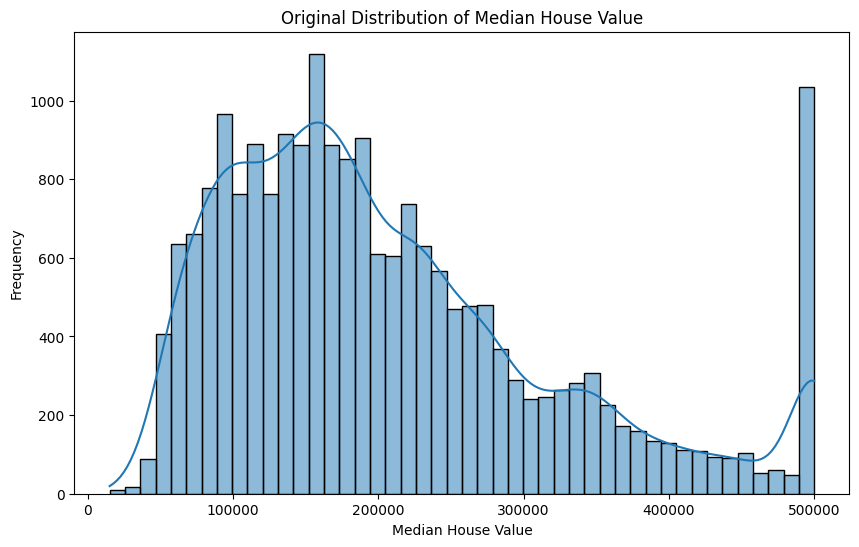

In [500]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the 'MedHouseVal' column
med_house_val = housing_df['MedHouseVal']

# Plot the original distribution of 'MedHouseVal'
plt.figure(figsize=(10, 6))
sns.histplot(med_house_val, kde=True)
plt.title('Original Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

###Min-Max Scaling

In [501]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Reshape the data as MinMaxScaler expects a 2D array
med_house_val_reshaped = med_house_val.values.reshape(-1, 1)

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
med_house_val_minmax_scaled = minmax_scaler.fit_transform(med_house_val_reshaped)

# Convert the scaled data back to a pandas Series
med_house_val_minmax_scaled_series = pd.Series(med_house_val_minmax_scaled.flatten(), name='MedHouseVal_MinMaxScaled')

print("Original Min:", med_house_val.min(), "Max:", med_house_val.max())
print("Scaled Min:", med_house_val_minmax_scaled_series.min(), "Max:", med_house_val_minmax_scaled_series.max())
display(med_house_val_minmax_scaled_series.head())

Original Min: 14999.0 Max: 500001.0
Scaled Min: 0.0 Max: 1.0


,MedHouseVal_MinMaxScaled
0,0.902266
1,0.708247
2,0.695051
3,0.672783
4,0.674638


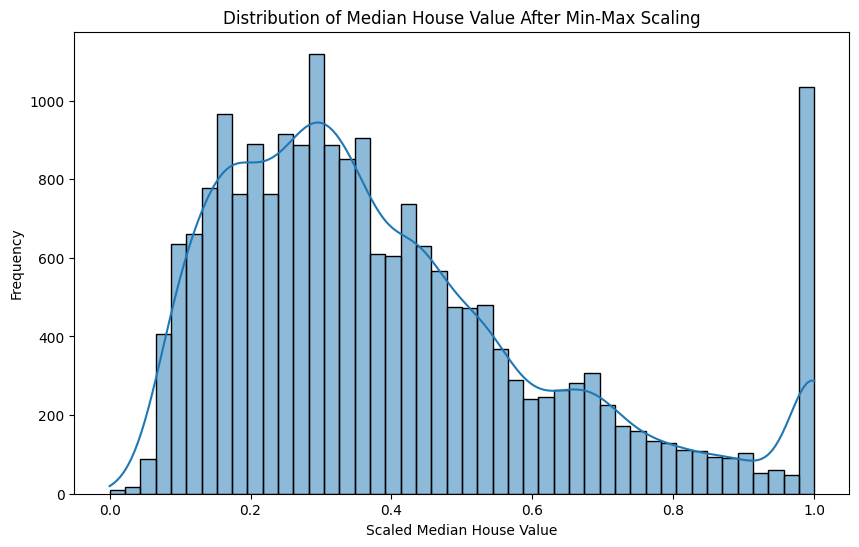

In [502]:
# Plot the distribution of the Min-Max scaled 'MedHouseVal'
plt.figure(figsize=(10, 6))
sns.histplot(med_house_val_minmax_scaled_series, kde=True)
plt.title('Distribution of Median House Value After Min-Max Scaling')
plt.xlabel('Scaled Median House Value')
plt.ylabel('Frequency')
plt.show()

###Standard Scaling

In [504]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reshape the data as StandardScaler expects a 2D array
med_house_val_reshaped = med_house_val.values.reshape(-1, 1)

# Apply Standard Scaling
standard_scaler = StandardScaler()
med_house_val_standard_scaled = standard_scaler.fit_transform(med_house_val_reshaped)

# Convert the scaled data back to a pandas Series (optional)
med_house_val_standard_scaled_series = pd.Series(med_house_val_standard_scaled.flatten(), name='MedHouseVal_StandardScaled')

print("Original Mean:", med_house_val.mean(), "Standard Deviation:", med_house_val.std())
print("Scaled Mean:", med_house_val_standard_scaled_series.mean(), "Standard Deviation:", med_house_val_standard_scaled_series.std())
display(med_house_val_standard_scaled_series.head())

Original Mean: 206855.81690891474 Standard Deviation: 115395.6158744132
Scaled Mean: -9.363741479009072e-17 Standard Deviation: 1.000024225686498


,MedHouseVal_StandardScaled
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900


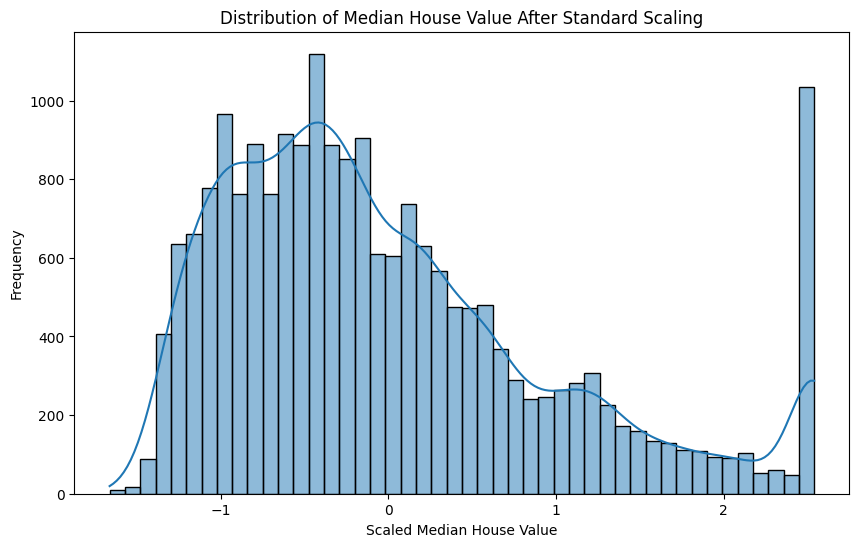

In [506]:
# Plot the distribution of the Standard Scaled 'MedHouseVal'
plt.figure(figsize=(10, 6))
sns.histplot(med_house_val_standard_scaled_series, kde=True)
plt.title('Distribution of Median House Value After Standard Scaling')
plt.xlabel('Scaled Median House Value')
plt.ylabel('Frequency')
plt.show()

 Min-Max Scaling scales data to a fixed range but is sensitive to outliers, which can compress the rest of the data's range.


 In contrast, Standard Scaling centers data around zero with a unit standard deviation and is less affected by extreme values because it uses the mean and standard deviation

##Label Encoding vs One-Hot Encoding
Take a categorical feature (e.g., "city" with values Delhi, Mumbai, Chennai). Encode it using both LabelEncoder and OneHotEncoder. Discuss when each should be used.

In [512]:
import seaborn
titanic_df = seaborn.load_dataset("titanic")

In [513]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


###Label Encoding

In [525]:
titanic_df = seaborn.load_dataset("titanic")

In [528]:
from sklearn.preprocessing import LabelEncoder

sex_data = titanic_df['sex']
le = LabelEncoder()

sex_label_encoded = le.fit_transform(sex_data)
sex_label_encoded_df = pd.DataFrame(sex_label_encoded, columns=['sex_label_encoded'], index=sex_data.index)



print("Original 'sex' values:")
display(sex_data.head())
print("\nLabel Encoded 'sex' values:")
display(sex_label_encoded_df.head()       )

Original 'sex' values:


,sex
0,male
1,female
2,female
3,female
4,male



Label Encoded 'sex' values:


,sex_label_encoded
0,1
1,0
2,0
3,0
4,1


###One Hot Encoding

In [522]:
titanic_df = seaborn.load_dataset("titanic")

In [529]:
from sklearn.preprocessing import OneHotEncoder

sex_data = titanic_df['sex']

sex_data_reshaped = sex_data.values.reshape(-1, 1)
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

sex_onehot_encoded = onehot_encoder.fit_transform(sex_data_reshaped)

onehot_col_names = onehot_encoder.get_feature_names_out(['sex'])
sex_onehot_df = pd.DataFrame(sex_onehot_encoded, columns=onehot_col_names, index=sex_data.index)

print("Original 'sex' values:")
display(sex_data.head())
print("\nOne-Hot Encoded 'sex' values:")
display(sex_onehot_df.head())

Original 'sex' values:


,sex
0,male
1,female
2,female
3,female
4,male



One-Hot Encoded 'sex' values:


,sex_female,sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


##Custom Function for Normalization
Write a function to manually normalize a feature (0–1 range). Compare its output with MinMaxScaler from sklearn.

In [542]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
iris_df = pd.DataFrame(data=X, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['species'] = Y

###Custom Function

In [543]:
#Custom Function for Normalizatino
def custom_minmax_normalize(feature):
  min_val = feature.min()
  max_val = feature.max()
  normalized_feature = (feature - min_val) / (max_val - min_val)
  return normalized_feature

In [547]:
petal_width = iris_df['petal_width']

# Apply the custom normalization function
petal_width_normalized_custom = custom_minmax_normalize(petal_width)

print("Original 'petal_width' values (first 5):")
display(petal_width.head())
print("\nCustom Normalized 'petal_width' values (first 5):")
display(petal_width_normalized_custom[:5])

Original 'petal_width' values (first 5):


,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2



Custom Normalized 'petal_width' values (first 5):


,petal_width
0,0.041667
1,0.041667
2,0.041667
3,0.041667
4,0.041667


###Min-Max Encoder

In [549]:
from sklearn.preprocessing import MinMaxScaler

petal_width_reshaped = petal_width.values.reshape(-1, 1)

scaler = MinMaxScaler()

petal_width_normalized_sklearn = scaler.fit_transform(petal_width_reshaped)

petal_width_normalized_sklearn_series = pd.Series(petal_width_normalized_sklearn.flatten(), name='petal_width_MinMaxScaler')

print("MinMaxScaler Normalized 'petal_width' values (first 5):")
display(petal_width_normalized_sklearn_series.head())

MinMaxScaler Normalized 'petal_width' values (first 5):


,petal_width_MinMaxScaler
0,0.041667
1,0.041667
2,0.041667
3,0.041667
4,0.041667


###Comparing Outputs

In [551]:
import numpy as np

are_outputs_equal = np.array_equal(petal_width_normalized_custom, petal_width_normalized_sklearn_series.values)

print(f"Are the outputs from the custom function and MinMaxScaler equal? {are_outputs_equal}")

# If not exactly equal due to floating point precision, we can check if they are close
if not are_outputs_equal:
    are_outputs_close = np.allclose(petal_width_normalized_custom, petal_width_normalized_sklearn_series.values)
    print(f"Are the outputs from the custom function and MinMaxScaler close? {are_outputs_close}")

# We can also check the difference between the two outputs
difference = petal_width_normalized_custom - petal_width_normalized_sklearn_series.values
print(f"Maximum absolute difference between the outputs: {np.max(np.abs(difference))}")

Are the outputs from the custom function and MinMaxScaler equal? False
Are the outputs from the custom function and MinMaxScaler close? True
Maximum absolute difference between the outputs: 1.1102230246251565e-16


##Imputation with Domain Knowledge
Suppose a "Salary" column has missing values. Instead of mean/median, fill them based on the "Education Level" column (hint: groupby + fillna). Show the steps.

In [559]:
import seaborn
titanic_df = seaborn.load_dataset("titanic")

In [562]:
print(titanic_df['age'].isna().sum())   #Getting the number of missing values of the 'age' feature

177


In [563]:
# Group by 'class' and fill missing 'age' values with the mean of each class
titanic_df['age'] = titanic_df.groupby('class')['age'].transform(lambda x: x.fillna(x.mean()))

print("Missing 'age' values after imputation:")
print(titanic_df['age'].isna().sum())

print("\nDataFrame head after imputation:")
display(titanic_df.head())

Missing 'age' values after imputation:
0

DataFrame head after imputation:


/tmp/ipython-input-2674221305.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df['age'] = titanic_df.groupby('class')['age'].transform(lambda x: x.fillna(x.mean()))


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##Detecting Outliers
Implement Z-score method to detect outliers in a numeric feature. Compare it with the IQR method for the same feature.

In [568]:
#Loading the data from GDrive link
#because sklearn.datasets.fetch_california_housing() was showing HTTP: 403 Forbidden Error


#URL to the data file
housing_data_url='https://drive.google.com/file/d/1wufowwwl36QcgFdskrWyrmAya_zpcsXO/view?usp=sharing'
housing_data_url='https://drive.google.com/uc?id=' + housing_data_url.split('/')[-2]

#Column names for the California Housing dataset (common features)
column_names = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
    'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'
]

# Read the data into a DataFrame
try:
    housing_df = pd.read_csv(housing_data_url, sep=',', header=None, names=column_names)
    display(housing_df.head())
except FileNotFoundError:
    print(f"Error: The data file was not found at {housing_data_url}. Please check the file path and name.")
except Exception as e:
    print(f"An error occurred: {e}")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


###Z-Score

In [574]:
from scipy import stats
import numpy as np

# Select the 'MedHouseVal' column
med_house_val = housing_df['MedHouseVal']

# Calculate the Z-scores for the 'MedHouseVal' column
z_scores = np.abs(stats.zscore(med_house_val))

# Set a threshold for identifying outliers (commonly 3 or -3)
z_score_threshold = 2.5

# Find the indices where the absolute Z-score is greater than the threshold
outlier_indices_zscore = np.where(z_scores > z_score_threshold)[0]

print(f"Number of outliers detected by Z-score method (threshold > {z_score_threshold}): {len(outlier_indices_zscore)}")
print("Indices of outliers detected by Z-score method (first 10):")
print(outlier_indices_zscore[:10])

Number of outliers detected by Z-score method (threshold > 2.5): 1011
Indices of outliers detected by Z-score method (first 10):
[ 89 459 493 494 509 510 511 512 514 517]


###IQR Method

In [572]:
import numpy as np

# Select the 'MedHouseVal' column (assuming it's still available as 'med_house_val')
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(med_house_val, 25)
Q3 = np.percentile(med_house_val, 75)

# Calculate the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the indices of outliers using the IQR method
outlier_indices_iqr = np.where((med_house_val < lower_bound) | (med_house_val > upper_bound))[0]

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")
print("-" * 50)
print(f"Number of outliers detected by IQR method: {len(outlier_indices_iqr)}")
print("Indices of outliers detected by IQR method (first 10):")
print(outlier_indices_iqr[:10])

Q1: 119600.00
Q3: 264725.00
IQR: 145125.00
Lower Bound (Q1 - 1.5*IQR): -98087.50
Upper Bound (Q3 + 1.5*IQR): 482412.50
--------------------------------------------------
Number of outliers detected by IQR method: 1071
Indices of outliers detected by IQR method (first 10):
[ 89 140 459 489 493 494 509 510 511 512]


##Feature Engineering
Create a new feature by combining two existing features in the dataset (e.g., BMI = weight / height²). Normalize and scale the new feature.

In [575]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
iris_df = pd.DataFrame(data=X, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['species'] = Y

###Creating 'PetalRatio' feature

In [578]:
# Select 'petal_length' and 'petal_width' columns
petal_length = iris_df['petal_length']
petal_width = iris_df['petal_width']

# Create the new feature 'PetalRatio'
iris_df['PetalRatio'] = petal_length / (petal_width + 1e-16)      #Adding a small epsilon to prevent ZeroDivisionError

print("DataFrame with the new 'PetalRatio' feature:")
display(iris_df.head())

DataFrame with the new 'PetalRatio' feature:


,sepal_length,sepal_width,petal_length,petal_width,species,PetalRatio
0,5.1,3.5,1.4,0.2,0,7.0
1,4.9,3.0,1.4,0.2,0,7.0
2,4.7,3.2,1.3,0.2,0,6.5
3,4.6,3.1,1.5,0.2,0,7.5
4,5.0,3.6,1.4,0.2,0,7.0


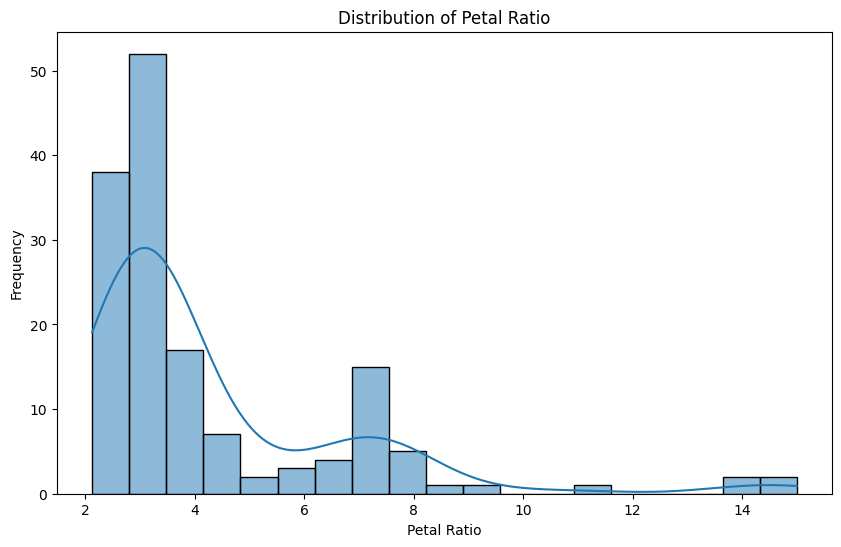

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the new 'PetalRatio' column
petal_ratio = iris_df['PetalRatio']

# Plot the distribution of 'PetalRatio'
plt.figure(figsize=(10, 6))
sns.histplot(petal_ratio, kde=True)
plt.title('Distribution of Petal Ratio')
plt.xlabel('Petal Ratio')
plt.ylabel('Frequency')
plt.show()

###Normalization and Scaling

In [580]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Select the 'PetalRatio' column
petal_ratio = iris_df['PetalRatio']

# Reshape the data as MinMaxScaler expects a 2D array
petal_ratio_reshaped = petal_ratio.values.reshape(-1, 1)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'PetalRatio' data
petal_ratio_normalized = scaler.fit_transform(petal_ratio_reshaped)

# Convert the result back to a pandas Series for easier handling (optional)
petal_ratio_normalized_series = pd.Series(petal_ratio_normalized.flatten(), name='PetalRatio_Normalized')

print("Original 'PetalRatio' values (first 5):")
print(petal_ratio.head())
print("\nMin-Max Normalized 'PetalRatio' values (first 5):")
display(petal_ratio_normalized_series.head())

Original 'PetalRatio' values (first 5):
0    7.0
1    7.0
2    6.5
3    7.5
4    7.0
Name: PetalRatio, dtype: float64

Min-Max Normalized 'PetalRatio' values (first 5):


,PetalRatio_Normalized
0,0.378641
1,0.378641
2,0.339806
3,0.417476
4,0.378641


In [582]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the 'PetalRatio' column (assuming it's still available as 'petal_ratio')
# Reshape the data as StandardScaler expects a 2D array
petal_ratio_reshaped = petal_ratio.values.reshape(-1, 1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the 'PetalRatio' data
petal_ratio_scaled = scaler.fit_transform(petal_ratio_reshaped)

# Convert the result back to a pandas Series for easier handling (optional)
petal_ratio_scaled_series = pd.Series(petal_ratio_scaled.flatten(), name='PetalRatio_Scaled')

print("Original 'PetalRatio' Mean:", petal_ratio.mean(), "Standard Deviation:", petal_ratio.std())
print("Scaled 'PetalRatio' Mean:", petal_ratio_scaled_series.mean(), "Standard Deviation:", petal_ratio_scaled_series.std())
display(petal_ratio_scaled_series.head())

Original 'PetalRatio' Mean: 4.310499757025203 Standard Deviation: 2.489648203570512
Scaled 'PetalRatio' Mean: 2.3684757858670006e-16 Standard Deviation: 1.0033500931359767


,PetalRatio_Scaled
0,1.083892
1,1.083892
2,0.882388
3,1.285397
4,1.083892
